# **Universiti Teknikal Malaysia Melaka (UTeM)**
### **Faculty of Artificial Intelligence and Cyber Security**

**Course:** BAXI 3413 - Natural Language Processing  
**Semester:** 1, Session 2025/2026  
**Lecturer:** DR.Muhammad Rehan Faheem
---

## **Project Title: Intelligent News Categorization Portal**
**Description:** Building an NLP-based system to classify news articles into categories (World, Sports, Business, Sci/Tech) using the AG News dataset.

---

### **Group Name: Isaac Newton**

**Group Members:**
1. **Husam Mohamed Yousif Hassan** (B032220033)
2. **Waleed Isskandar Alawi Alamandari** (B032220031)
3. **Osaid Ahmed Hashem Almashwali** (B032220032)
4. **Yaseen Mohamed Awad Sharif** (B032220060)

In [1]:
import pandas as pd
import numpy as np

# Display setting to show full text content in columns if needed
pd.set_option('display.max_colwidth', None)

In [2]:
# Dataset URLs (AG News Dataset)
train_url = "https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv"
test_url = "https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv"

# Define column names manually because the raw CSV has no header
column_names = ['class_index', 'title', 'description']

# Read the CSV files
df_train = pd.read_csv(train_url, names=column_names)
df_test = pd.read_csv(test_url, names=column_names)



In [3]:
# Check the shape of the data
print("Training Data Shape:", df_train.shape)
print("Testing Data Shape:", df_test.shape)

# Show the first 5 rows
df_train.head()

Training Data Shape: (120000, 3)
Testing Data Shape: (7600, 3)


,class_index,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


## 4. Data Preparation
We need to prepare the data before analysis.
1. **Merge Columns:** Combine `title` and `description` into a single column called `text` to provide more context for the model.
2. **Map Categories:** Convert numeric labels (1-4) into readable category names:
   - 1: World
   - 2: Sports
   - 3: Business
   - 4: Sci/Tech

In [4]:
# Combine Title and Description
df_train['text'] = df_train['title'] + " " + df_train['description']
df_test['text'] = df_test['title'] + " " + df_test['description']

# Map Class Indices to Category Names
label_map = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}

df_train['category'] = df_train['class_index'].map(label_map)
df_test['category'] = df_test['class_index'].map(label_map)

# Keep only the necessary columns
df_train = df_train[['category', 'text']]
df_test = df_test[['category', 'text']]


In [5]:
df_train.head()

,category,text
0,Business,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,Business,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,Business,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,Business,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


## 5. Exploratory Data Analysis (EDA)
In this section, we visualize the dataset to understand its structure.
We will check:
1. **Class Distribution:** To ensure the dataset is balanced.
2. **Text Length Distribution:** To analyze the length of news articles.

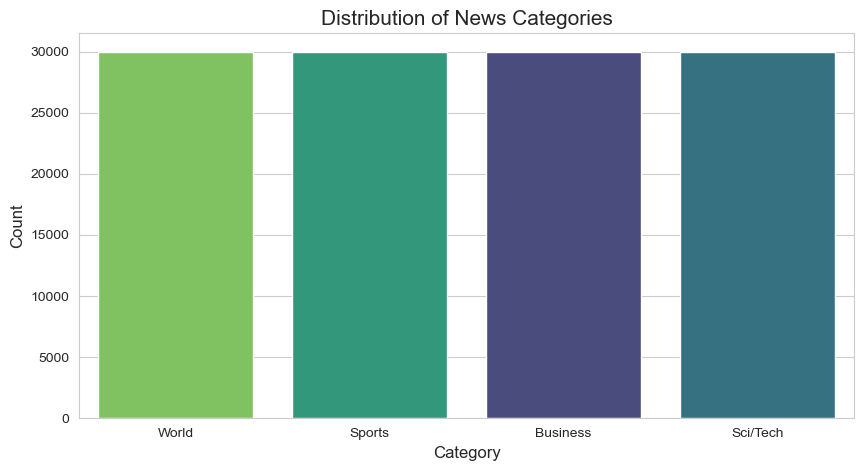

category
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1. Visualize Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='category',hue='category', data=df_train, palette='viridis', order=['World', 'Sports', 'Business', 'Sci/Tech'],legend=False)
plt.title('Distribution of News Categories', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Print exact counts
print(df_train['category'].value_counts())

### Text Length Analysis
We calculate the number of words in each article to understand the data size better.

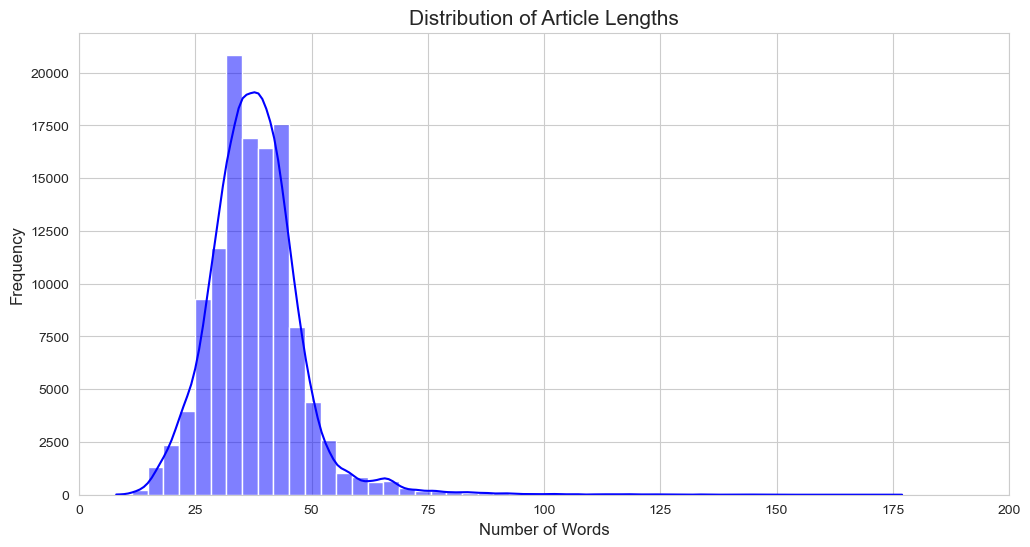

count    120000.000000
mean         37.847450
std          10.085245
min           8.000000
25%          32.000000
50%          37.000000
75%          43.000000
max         177.000000
Name: word_count, dtype: float64


In [9]:
# Calculate word count for each article
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

# 2. Visualize Text Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_train['word_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Article Lengths', fontsize=15)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 200)
plt.show()

# Show statistics
print(df_train['word_count'].describe())

## 6. Data Preprocessing
In this step, we prepare the text for the machine learning model using advanced NLP techniques.
We use **contractions** library and **spaCy** to:
1.  **Expand Contractions:** Convert "don't" to "do not", "I'm" to "I am", etc.
2.  **Tokenization & Lemmatization:** Split text and convert words to their base form.
3.  **Noise Removal:** Remove stop-words, punctuation, and numbers.
4.  **Lowercasing:** Convert all text to lowercase.

In [11]:
import spacy
import contractions
import re

# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

In [12]:
def preprocess_text(text):
    """
    Full pipeline:
    1. Expand Contractions.
    2. Clean text using spaCy (Lemmatization, Stop-words removal).
    """
    # 1. Expand contractions
    try:
        text = contractions.fix(text)
    except:
        pass

    # 2. Parse with spaCy
    doc = nlp(text)
    
    # 3. Lemmatize & Remove unwanted tokens
    clean_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num:
            clean_tokens.append(token.lemma_.lower())
    
    return " ".join(clean_tokens)

In [13]:
# Initialize list to store cleaned text
clean_train_texts = []
total_train = len(df_train)

# Loop through the training data
for i, text in enumerate(df_train['text']):
    cleaned = preprocess_text(text)
    clean_train_texts.append(cleaned)
    
    # Print progress every 10,000 rows
    if (i + 1) % 10000 == 0:
        print(f"Processed {i + 1}/{total_train} rows")

# Assign back to DataFrame
df_train['clean_text'] = clean_train_texts


Processed 10000/120000 rows
Processed 20000/120000 rows
Processed 30000/120000 rows
Processed 40000/120000 rows
Processed 50000/120000 rows
Processed 60000/120000 rows
Processed 70000/120000 rows
Processed 80000/120000 rows
Processed 90000/120000 rows
Processed 100000/120000 rows
Processed 110000/120000 rows
Processed 120000/120000 rows


In [15]:
##Processing Testing set
# Reuse the same logic for test data
clean_test_texts = []
total_test = len(df_test)

for i, text in enumerate(df_test['text']):
    cleaned = preprocess_text(text)
    clean_test_texts.append(cleaned)
    
    if (i + 1) % 2000 == 0:
        print(f"Processed {i + 1}/{total_test} rows")

df_test['clean_text'] = clean_test_texts


Processed 2000/7600 rows
Processed 4000/7600 rows
Processed 6000/7600 rows


In [17]:
# check the results

# Sample index to check
idx = 10
print("Original Text:")
print(df_train['text'].iloc[idx])

print("\nProcessed Text (Cleaned):")
print(df_train['clean_text'].iloc[idx])

Original Text:
Oil and Economy Cloud Stocks' Outlook  NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market next week during the depth of the  summer doldrums.

Processed Text (Cleaned):
oil economy cloud stocks outlook   new york reuters soar crude price plus worry   economy outlook earning expect   hang stock market week depth   summer doldrum


## 7. Feature Extraction (TF-IDF)
Machine learning models cannot process raw text. We need to convert the cleaned text into numerical vectors.

We will use **TF-IDF (Term Frequency-Inverse Document Frequency)**.
* It assigns a weight to each word based on its importance.
* We limit the number of features to the top **5,000 most frequent words** to keep the model fast and efficient.

In [18]:
# Split the data into features (X) and target labels (y)
X_train_text = df_train['clean_text']
y_train = df_train['category']

X_test_text = df_test['clean_text']
y_test = df_test['category']

print(f"Training Data: {len(X_train_text)} samples")
print(f"Testing Data: {len(X_test_text)} samples")

Training Data: 120000 samples
Testing Data: 7600 samples


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# max_features=5000
tfidf = TfidfVectorizer(max_features=5000)

# Fit on training data and transform it
X_train = tfidf.fit_transform(X_train_text)

# Only transform the test data (do not fit!)
X_test = tfidf.transform(X_test_text)


In [23]:
# Check the dimensions of the feature matrix (Number of Rows, Number of Features/Words)

X_train.shape


(120000, 5000)

In [24]:
X_test.shape

(7600, 5000)

## 8. Model Training and Comparison
We will train two popular classifiers for text classification and compare their performance:
1. **Logistic Regression:**
2. **Multinomial Naive Bayes:** 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#Training Logistic Regression
# max_iter=1000 ensures the model has enough time to find the best solution
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

#Training Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print(f"Logistic Regression Accuracy: {lr_acc * 100:.2f}%")
print(f"Naive Bayes Accuracy:         {nb_acc * 100:.2f}%")

Logistic Regression Accuracy: 90.91%
Naive Bayes Accuracy:         89.05%


## 9. Model Evaluation (Confusion Matrix)
Based on the comparison, we visualize the performance of the best performing model using a **Confusion Matrix**.
This helps us see which categories are being confused with each other.

The best model is: Logistic Regression


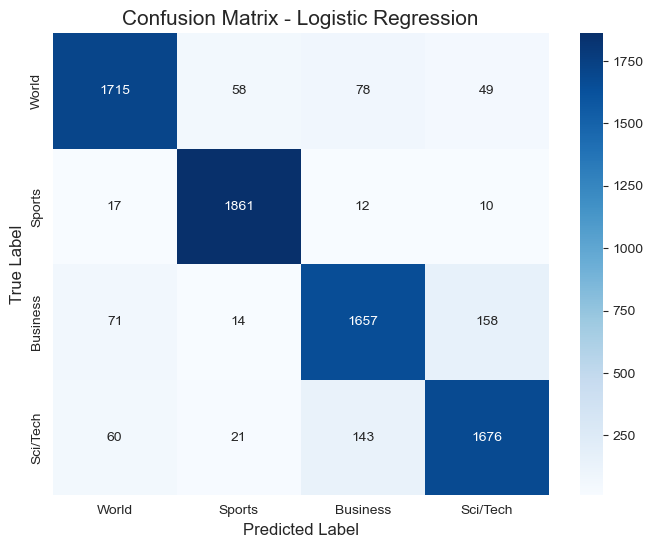


Classification Report:
              precision    recall  f1-score   support

    Business       0.88      0.87      0.87      1900
    Sci/Tech       0.89      0.88      0.88      1900
      Sports       0.95      0.98      0.97      1900
       World       0.92      0.90      0.91      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# select the best model
if lr_acc > nb_acc:
    best_model = lr_model
    best_pred = lr_pred
    name = "Logistic Regression"
else:
    best_model = nb_model
    best_pred = nb_pred
    name = "Naive Bayes"

print(f"The best model is: {name}")

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred, labels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], 
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title(f'Confusion Matrix - {name}', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()
# Print classification report in details
print("\nClassification Report:")
print(classification_report(y_test, best_pred))

## save the model and vectorizer

In [31]:
import joblib
model_filename = 'news_classifier_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'
# Save the best model
joblib.dump(best_model, model_filename)

# Save the TF-IDF vectorizer
joblib.dump(tfidf, vectorizer_filename)


['tfidf_vectorizer.pkl']